In [1]:
import statistics
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
height, width = 250, 200

In [3]:
img = Image.open('../assets/moon.png').convert('L').resize((width, height))
arr = np.array(img)

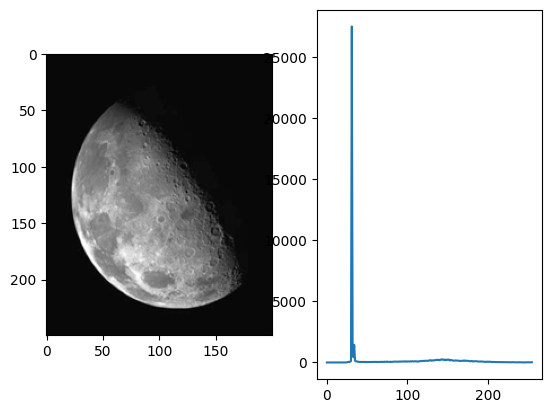

In [4]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img, 'gray')
axes[1].plot(img.histogram())

### **Edge detection**

In [5]:
edge_arr = arr.copy()

for i in range(height):
    for j in range(width):
        laplacian = 0
        if i < height-1:
            laplacian += int(edge_arr[i+1, j]) - int(edge_arr[i, j])
        if j < width-1:
            laplacian += int(edge_arr[i, j+1]) - int(edge_arr[i, j])
        if laplacian > 255:
            laplacian = 255
        elif laplacian < 0:
            laplacian = 0
        edge_arr[i, j] = laplacian

In [6]:
edge_img = Image.fromarray(edge_arr)

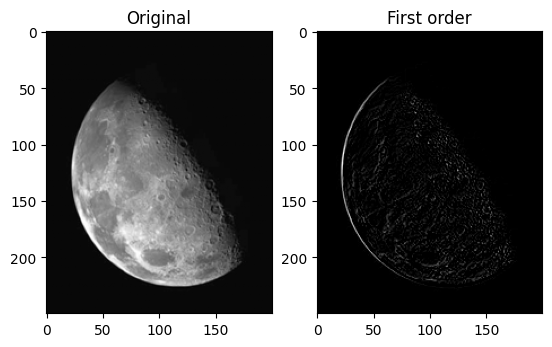

In [7]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title('Original')
axes[0].imshow(img, 'gray')
axes[1].set_title('First order')
axes[1].imshow(edge_img, 'gray')

### **Image sharpening**

In [8]:
sharp_arr = arr.copy()

for i in range(height):
    for j in range(width):
        laplacian = 0
        if i < height-1:
            laplacian += int(arr[i+1, j]) - int(arr[i, j])
        if i > 0:
            laplacian += int(arr[i-1, j]) - int(arr[i, j])
        if j < width-1:
            laplacian += int(arr[i, j+1]) - int(arr[i, j])
        if j > 0:
            laplacian += int(arr[i, j-1]) - int(arr[i, j])
        laplacian = int(arr[i, j]) - laplacian
        if laplacian > 255:
            laplacian = 255
        elif laplacian < 0:
            laplacian = 0
        sharp_arr[i, j] = laplacian

In [9]:
sharp_img = Image.fromarray(sharp_arr)

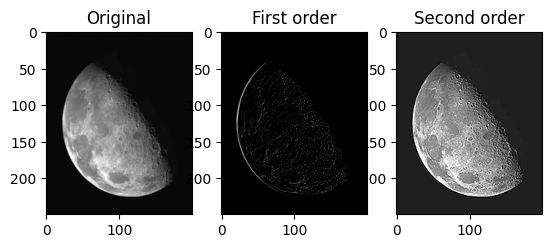

In [10]:
fig, axes = plt.subplots(1, 3)
axes[0].set_title('Original')
axes[0].imshow(img, 'gray')
axes[1].set_title('First order')
axes[1].imshow(edge_img, 'gray')
axes[2].set_title('Second order')
axes[2].imshow(sharp_img, 'gray')